# PHYS 210 Mini-Project 02
### RLC Oscillations
Due Mon, Nov 14, 2022 - 9am

#### Project objective

Use `solve_ivp()` to solve the differential equation governing a series RLC circuit, looking at the behaviours of underdamped, critically damped, and overdamped circuits.

#### Before getting started

1. Read the Mini-Project 02 background handout in the same folder as this notebook
1. Read the updated grading rubric document, also in this folder (and on Canvas). It was updated so that the total sums to 100 points, not including the bonus categories.

#### Part 1. Initial Set-up

So that your solutions are as general as possible, we are going to generate random values for your inductance and capacitance in the circuit, with some constraints. Your solutions from one execution of your code to the next might be multiple orders of magnitude different, so decisions about which ranges of values to include should be automated to some extent so that the graphs are able to always show the desired features clearly.

Choose random values of $L$ and $C$, with the following constraints:

1. Start by generating a two-digit integer, $a_L$ between 10 and 99 (inclusive), and
1. A random integer, $b_L$, between -5 and -9 (inclusive) for the exponent.

The inductance is then given by $L = {a_L} \times 10^{b_L}$ Henries.

Repeat this process using the same constraints, but with _**new**_ random numbers to get the capacitance, $C = {a_C} \times 10^{b_C}$ Farad.

Finally, we determine three values of $R$, to represent the underdamped, critically damped and overdamped cases, respectively, based on the already determined values of $L$ and $C$:

$$R_1 = \frac{1}{10} \times 2\pi\sqrt{\frac{L}{C}}$$
$$R_2 = 2\pi\sqrt{\frac{L}{C}}$$
$$R_3 = 5 \times 2\pi\sqrt{\frac{L}{C}}$$

In [1]:
"""This code randomly generates values of L, R, and C
for our LRC circuit. The 3 resistance values R_1, R_2, R_3
corresponding to the underdamped, critically damped, and
overdamped case are determined based on the values of L and C"""

from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

# random values for the calculation of inductance
a_L = np.random.randint(10, 100)
b_L = np.random.randint(-9, -4)

L = a_L * 10 ** b_L  # the inductance (H)

# random values for the calculation of capacitence
a_C = np.random.randint(10, 100)
b_C = np.random.randint(-9, -4)

C = a_C * 10 ** b_C  # the capacitence (F)

# the 3 values of resistance for the 3 different cases
R_1 = 1 / 10 * 2 * np.sqrt(L / C)  # under-damped (Ohms)
R_2 = 2 * np.sqrt(L / C)  # critically damped (Ohms)
R_3 = 5 * 2 * np.sqrt(L / C)  # over-damped (Ohms)

#### Part 2: Time evolution of the current in the three circuits

We will use a primary observable of the current in the circuit $I(t)=dq(t)/dt$ to describe what is happening in each circuit. The current in the circuit is driven by an AC voltage source, with amplitude $V_0$ and frequency $\omega$, much like how you can increase the amplitude of a person on a swing by providing an external periodic push. We will have our voltage source provide its voltage at a frequency of $\omega = \omega_0 = 1/\sqrt{LC}$ to match the resonant frequency of the circuit, much like how you want to match the timing of your pushes to the oscillation frequency of the person on the swing.

These types of systems can take a while to settle into their steady-state oscillatory behaviour, so we want to see how long it takes each circuit to get to get to a steady-state amplitude for the current, starting from an initial state of no charge on the capacitor, $q(0)=0$ and no current in the circuit, $I(0)=0$.

**The task:** 

* Generate a 3-panel figure that shows the time evolution of $I(t)$ for the three cases above, driven by a sinusoidal voltage of $(V_0 = 0.1\textrm{V})$ at a frequency of $\omega = \omega_0$. Start with the initial conditions of no charge stored in the capacitor and no current in the circuit, $q(0) = I(0) = 0$.
* Ensure that your code chooses the time interval and time steps wisely so that it captures the behaviour of the oscillator, such that you can see the evolution (known as the transient) from  $I(0) = 0$ to the stable amplitude of the oscillating current. One challenge is to write the program so that it will work well over the large range of possible $L$ and $C$ values generated from the random numbers, will work well across the three types of damping, and will still generate plots showing the requested features. You should test your code with the Validate button several times, which should generate new random values of $L$ and $C$ to ensure that your plots look good each time.

**The small details:**

* The figure should consist of _three_ vertically stacked subplots, each showing the behaviour for one of the damping cases, clearly labelled as underdamped, critically damped and overdamped.
* The values of the randomly generated R, L and C should be indicated in the titles of each panel.
* You should use a common time interval across all three subplots.

Text(0.5, 0, 'Time (s)')

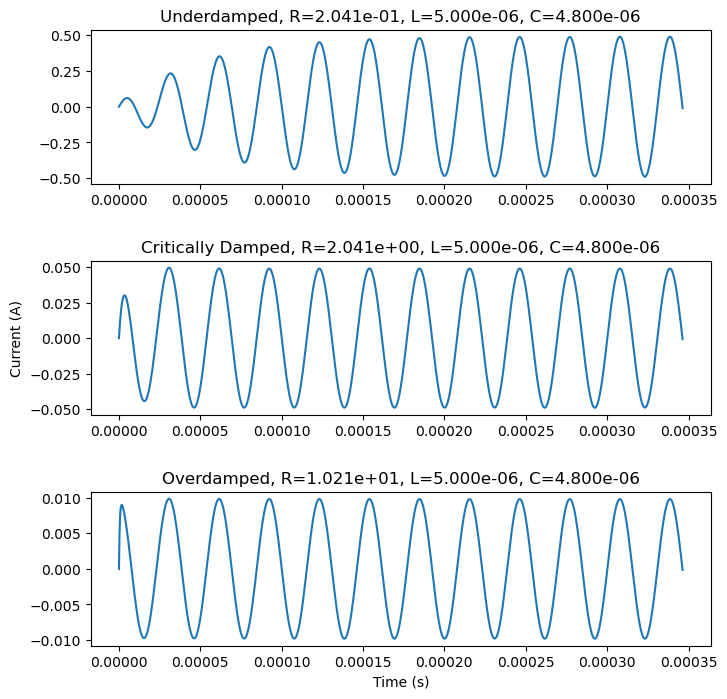

In [2]:
"""The following code will use scipy's numerical integration function
to model the behaviour of a simple LRC circuit given some randomly
generated values of R, L, and C, and some AC voltage source. Three
values of resistance will be investigated: the underdamped case, the
critically damped case, and the overdamped case. The current will be
plotted agaist time to demonstrate the transient response for all 3 cases"""

from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

V_0 = 0.1  # inital voltage, also the amplitude (V)
I_0 = 0  # initial current (A)
q_0 = 0  # initial charge on capacitor (C)
freq = 1 / np.sqrt(L * C)  # frequency of voltage oscillation (rad/s)

R_arr = [R_1, R_2, R_3]  # makes a list of resistance values


def dydt_arr(t, y_arr, V_0, R):
    """Relates the used physical quantities to their differential
    equations for use in the scipy numerical integration function

    t is the time at which the differential equation is evaluated
    y_arr is an array of initial values that will change with t
    V_0 is the initial voltage used in calculations
    R is the particular value of resistance used in calculations

    returns differental equations for values in y_arr"""

    I_c = y_arr[0]  # 1st physical quantity, current (A)
    q = y_arr[1]  # 2nd physical quantity, charge (C)
    V = V_0 * np.cos(freq * t)  # the voltage at time t

    # This is [dI/dt, dq/dt]
    return np.array([1 / L * V - 1 / (L * C) * q - R / L * I_c, I_c])


t_0 = 0  # start time (s)
t_max = np.sqrt(L * C) * 70.7  # end time (s)
steps = 1000  # number of steps
t_arr = np.linspace(t_0, t_max, steps)  # array of evaluated times

# defines the inititial value arrayt of our physical quantities
y_0arr = np.array([I_0, q_0])

sol_arr = []  # creating solution list outside of loop

# loops over all 3 resistance values
for i in R_arr:

    # numerically solves differential eqs returned by dydt
    sol = integrate.solve_ivp(dydt_arr, (t_0, t_max),
                              y_0arr,
                              method='LSODA',
                              t_eval=t_arr,
                              args=(V_0, i))

    sol_arr.append(sol['y'][0])  # appends I solutions
    sol_arr.append(sol['y'][1])  # appends q solutions

R1sol_I = sol_arr[0]  # extracts I solution for R1
R2sol_I = sol_arr[2]  # extracts I solution for R2
R3sol_I = sol_arr[4]  # extracts I solution for R3

# sets the size of figure
plt.figure(1, figsize=(8, 8))

# creates first subplot
plt.subplot(3, 1, 1)
# plots current vs time
plt.plot(t_arr, R1sol_I)
# labels plot and gives R_1, L, C in title
plt.title("Underdamped, R={:.3e}, L={:.3e}, C={:.3e}".format(R_1, L, C))

# creates second subplot
plt.subplot(3, 1, 2)
# plots current vs time
plt.plot(t_arr, R2sol_I)
# labels plot and gives R_2, L, C in title
plt.title("Critically Damped, R={:.3e}, L={:.3e}, C={:.3e}".format(R_2, L, C))
# labels y axis and gives units
plt.ylabel("Current (A)")

# creates third subplot
plt.subplot(3, 1, 3)
# plots current vs time
plt.plot(t_arr, R3sol_I)
# labels plot and gives R_3, L, C in title
plt.title("Overdamped, R={:.3e}, L={:.3e}, C={:.3e}".format(R_3, L, C))

# adjusts subplot spacing to give more room
plt.subplots_adjust(hspace=0.5)
# labels x axis and gives units
plt.xlabel("Time (s)")

#### Part 3: Resonance plots

Lastly, we want to explore how the steady-state amplitude in each of the three circuits depends on the frequency $(\omega)$ of the sinusoidal driving voltage. Resonance, which occurs when the provided driving frequency closely matches the natural/resonant frequency of the system, is famously the cause of the Tacoma Narrows bridge collapse.

To explore the dependence of the steady-state amplitude of the current on the frequency $(\omega)$ of the sinusoidal driving voltage, generate another figure with three vertically-stacked subplots. Each panel/subplot should show a plot of the steady-state amplitude of the current vs the frequency of the driving voltage for a range from 

$$0.1 \frac{\omega_0}{2 \pi} \; \textrm{ to }\; 2 \frac{\omega_0}{2 \pi}.$$.

The three panels should show the resonance curves (amplitude of the steady-state current vs $\omega$), clearly labelled for the three damping cases. For each point you plot, the current should represent the amplitude of the response current (for a drive amplitude of $V_0 = 0.1\textrm{V}$) at a time _after_ the transient behaviour has died away, such that and the current has stabilized to a steady sinusoidal oscillation. Your calculations should be made at frequencies spaced closely enough that when plotted with a continuous line, the curves are smooth. The values of R, L and C should be indicated in the titles of each panel. The plots should use Hz units ($\omega/2\pi$).

This will require calling `solve_ivp()` numerous times and will require more cpu time to execute than anything we have seen so far, though should in total not take more than a minute or so.

**The small details:**

* The figure should consist of _three_ vertically stacked subplots, each showing the behaviour for one of the damping cases, clearly labelled as underdamped, critically damped and overdamped.
* The values of R, L and C should be indicated in the titles of each panel.

Text(0.5, 0, 'Frequency (Hz)')

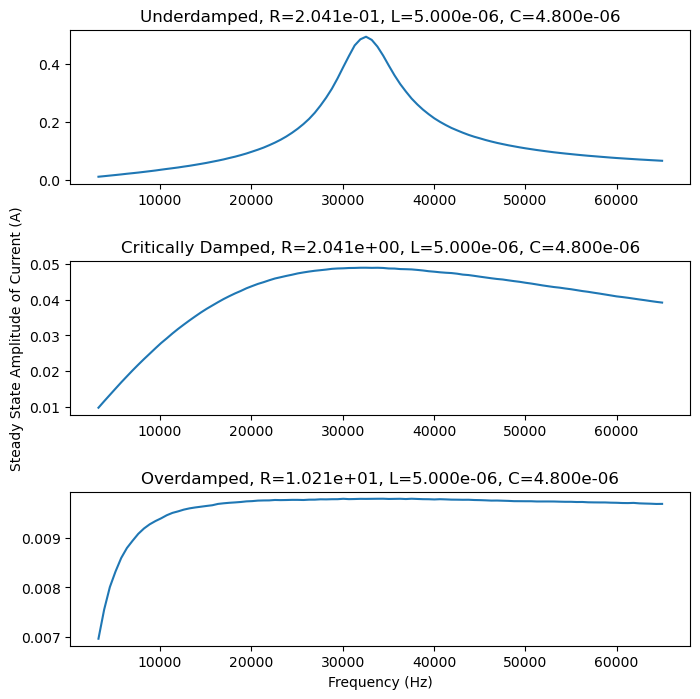

In [3]:
"""The following code will use scipy's numerical integration function
to model the behaviour of a simple LRC circuit given some randomly
generated values of R, L, and C, and some AC voltage source. Three
values of resistance will be investigated: the underdamped case, the
critically damped case, and the overdamped case. The amplitude of the
steady state current for a range of frequencties will be calculated and
plotted for all 3 cases to demonstrate resonant behaviour of the circuit."""

from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

V_0 = 0.1  # inital voltage, also the amplitude (V)
I_0 = 0  # initial current (A)
q_0 = 0  # initial charge on capacitor (C)
freq_0 = 1 / np.sqrt(L * C)  # resonant frequency (rad/s)
fsteps = 100  # number of steps for frequency array
# the array of frequencies of AC voltage used in calculations
freqs = np.linspace(0.1 * freq_0, 2 * freq_0, fsteps)

t_0 = 0  # start time (s)
tsteps = 1000  # number of steps for time array

R_arr = [R_1, R_2, R_3]  # makes a list of resistance values

# defines the inititial values of our physical quantities
y_0arr = np.array([I_0, q_0])


def calc_tarr(freq):
    """Calculates the desired time range where steady state
    behaviour occurs for a given frequency

    freq is the frequency of the AC voltage source that will
    be used to find a good time range

    returns time values array"""

    t_max = ((2 * np.pi) / freq) * 40  # end time based on freq (s)
    t_arr = np.linspace(t_0, t_max, tsteps)  # array of evaluated times
    return t_arr


def dydt_arr(t, y_arr, V_0, R, freq):
    """Relates the used physical quantities to their differential
        equations for use in the scipy numerical integration function

        t is the time at which the differential equation is evaluated
        y_arr is an array of initial values that will change with t
        V_0 is the initial voltage used in calculations
        R is the particular value of resistance used in calculations
        freq is the frequency of the AC voltage source used in
        calculations

        returns differental equations for values in y_arr"""

    I_c = y_arr[0]  # 1st physical quantity, current (A)
    q = y_arr[1]  # 2nd physical quantity, charge (C)
    V = V_0 * np.cos(freq * t)  # the voltage at time t (V)

    # This is [dI/dt, dq/dt]
    return np.array([1 / L * V - 1 / (L * C) * q - R / L * I_c, I_c])


def solve(R, freq):
    """This function calculates the solutions of current across
    a specified time interval t_arr (global variable) for a specific
    driving frequency and resistance.

    R is the resistance value we are solving for in the RLC circuit
    freq is the frequency of the driving AC votage source

    returns the solutions for current over t_arr"""

    # calculates desired time interval and stores time values array
    t_arr = calc_tarr(freq)

    # below is the scipy numerical integration function
    sol = integrate.solve_ivp(dydt_arr, (t_arr[0], t_arr[-1]),
                              y_0arr,
                              method='LSODA',
                              t_eval=t_arr,
                              args=(V_0, R, freq))

    return sol['y'][0]  # returns the current (I) solution array


def get_amps(freq):
    """Defines a function for the sole purpose of being able to
    use map() to map frequency values to this function as inputs

    freq is the frequency of the AC voltage source used for the steady
    state calculations

    returns tuple of steady state current amplitudes for 3 cases:
    (underdamped, critically damped, overdamped) at the given freq"""

    def calc_amp(wave):
        """This function calculates the steady state amplitude of
        an input wave by performing calculations on the last 3rd
        of data points.

        wave is the array of data points forming a periodic curve

        returns the amplitude of the input wave data points"""

        start = int(len(wave) * 2 / 3)  # starts in the last 2/3 of wave
        # calculates amplitude by taking max and min of last 2/3
        # of wave and dividing that by 2
        amp = (np.max(wave[start:]) - np.min(wave[start:])) / 2
        return amp  # returns the steady state amplitude of wave

    #  maps the 3 resistance values to the solve function
    #  with the input frequency
    Isols = list(map(solve, R_arr, [freq] * 3))

    R1sol_I = Isols[0]  # extracts I solution for R1
    # calculates steady state current amplitude of underdamped case
    R1amp = calc_amp(R1sol_I)

    R2sol_I = Isols[1]  # extracts I solution for R2
    # calculates steady state current amplitude of critically damped case
    R2amp = calc_amp(R2sol_I)

    R3sol_I = Isols[2]  # extracts I solution for R3
    # calculates steady state current amplitude of overdamped case
    R3amp = calc_amp(R3sol_I)

    # returns a tuple of steady state current amplitudes for 3 cases
    return R1amp, R2amp, R3amp


# the solve function is mapped to the range of frequencies
# makes a list of 3 sublists where the first sublist is the
# underdamped case, the second is the critically damped case
# and the third is the overdmaped case
amps = list(zip(*list(map(get_amps, freqs))))

# sets the size of figure
plt.figure(1, figsize=(8, 8))

# creates first subplot
plt.subplot(3, 1, 1)
# converts angular frequency to normal frequency (Hz) and plots
# underdamped case across frequency range
plt.plot(freqs / (2 * np.pi), amps[0])
# labels plot and gives R_1, L, C in title
plt.title("Underdamped, R={:.3e}, L={:.3e}, C={:.3e}".format(R_1, L, C))

# creates second subplot
plt.subplot(3, 1, 2)
# converts angular frequency to normal frequency (Hz) and plots
# critically damped case across frequency range
plt.plot(freqs / (2 * np.pi), amps[1])
# labels plot and gives R_2, L, C in title
plt.title("Critically Damped, R={:.3e}, L={:.3e}, C={:.3e}".format(R_2, L, C))
# labels y axis and gives units
plt.ylabel("Steady State Amplitude of Current (A)")

# creates third subplot
plt.subplot(3, 1, 3)
# converts angular frequency to normal frequency (Hz) and plots
# overdamped case across frequency range
plt.plot(freqs / (2 * np.pi), amps[2])
# labels plot and gives R_3, L, C in title
plt.title("Overdamped, R={:.3e}, L={:.3e}, C={:.3e}".format(R_3, L, C))

# adjusts subplot spacing to give more room
plt.subplots_adjust(hspace=0.5)
# labels x axis and gives units
plt.xlabel("Frequency (Hz)")

# Acknowledgements

In the cell below, please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook.

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."


_Acknowledgements here:_



# Extension Code and Description
All solution code for the main project question should appear in the cell "cell-project1-main" above. Project extensions go in the cell "cell-extension" immediately below and the descriptions of your extension go in the cell below that.

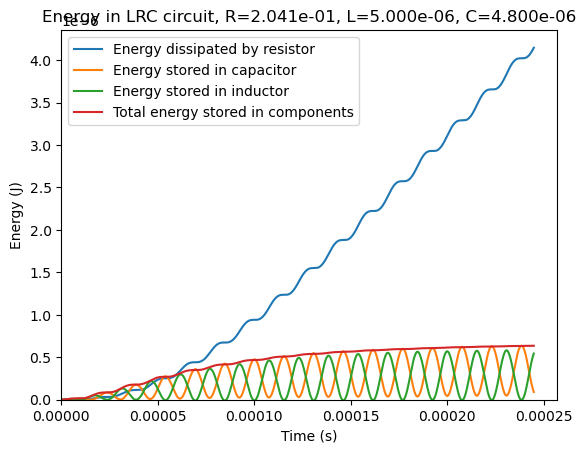

In [4]:
"""This code will use scipy's numerical integration function
to investigate the energy stored within and the energy dissipated
by the components of the LRC circuit for the underdamped case of
our RLC circuit. The results will be plotted to see how these
quantities change with time."""

from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

V_0 = 0.1  # inital voltage, also the amplitude
I_0 = 0  # initial current
q_0 = 0  # initial charge on capacitor
Er_0 = 0  # initial energy dissipated through resistor
Ec_0 = 1 / 2 * q_0 ** 2 / C  # initial energy stored in capacitor
El_0 = 1 / 2 * L * I_0 ** 2  # initial energy stored in inductor
freq = 1 / np.sqrt(L * C)  # frequency of voltage oscillation

t_0 = 0  # start time
t_max = np.sqrt(L * C) * 50  # end time
steps = 10000  # number of steps
t_arr = np.linspace(t_0, t_max, steps)  # array of evaluated times

# defines the inititial values of our physical quantities
y_0arr = np.array([I_0, q_0, Er_0, Ec_0, El_0])


def dydt_arr(t, y_arr):
    """Relates the used physical quantities to their differential
    equations for use in the scipy numerical integration function

    t is the time at which the differential equation is evaluated
    y_arr is an array of initial values that will change with t
  
    returns differental equations for values in y_arr"""

    I_c = y_arr[0]  # 1st physical quantity, current (A)
    q = y_arr[1]  # 2nd physical quantity, charge (C)
    Er = y_arr[2]  # 3rd physical quantity, energy dissipated by resistor (J)
    Ec = y_arr[3]  # 4th physical quantity, energy stored in capacitor (J)
    El = y_arr[4]  # 5th physical quantity, energy soted in inductor (J)
    V = V_0 * np.cos(freq * t)  # the voltage at time t

    # This is [dI/dt, dq/dt, dEr/dt, dEc/dt, dEl/dt]
    return np.array([1 / L * V - 1 / (L * C) * q - R_1 / L * I_c, I_c, I_c ** 2 * R_1, q / C * I_c, L * I_c * (1 / L * V - 1 / (L * C) * q - R_1 / L * I_c)])

sol_arr = []  # creating solution list outside of loop

# numerically solves differential eq dydt
sol = integrate.solve_ivp(dydt_arr, (t_0, t_max),
                            y_0arr,
                            t_eval=t_arr,)

sol_arr.append(sol['y'][0])  # appends I solutions
sol_arr.append(sol['y'][1])  # appends q solutions
sol_arr.append(sol['y'][2])  # appends Er solutions
sol_arr.append(sol['y'][3])  # appends Ec solutions
sol_arr.append(sol['y'][4])  # appends El solutions

sol_Er = sol_arr[2]  # extracts Er solution
sol_Ec = sol_arr[3]  # extracts Ec solution
sol_El = sol_arr[4]  # extracts El solution

# plots energy dissipated through resistor vs time
plt.plot(t_arr, sol_Er)
# plots energy stored in capacitor vs time
plt.plot(t_arr, sol_Ec)
# plots energy stored in inductor vs time
plt.plot(t_arr, sol_El)
# plots total energy stored in system
plt.plot(t_arr, (np.array(sol_Ec) + np.array(sol_El)))
# labels plot and gives R_1, L, C in title
plt.title("Energy in LRC circuit, R={:.3e}, L={:.3e}, C={:.3e}".format(R_1, L, C))
# labels y axis and gives units
plt.ylabel("Energy (J)")
# labels x axis and gives units
plt.xlabel("Time (s)")
plt.legend(['Energy dissipated by resistor', 'Energy stored in capacitor', 'Energy stored in inductor', 'Total energy stored in components'])
# sets plot limits
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.yscale('linear')

_In this cell, please describe any new language features or project extension you have implemented:_
I used the python map() function for the steady state section to map my get_amps() function to the range
of frequencies used to generate the plot and to map the 3 resistance values to my solve() function rather than use a for loop.




# Grading cells
The cells below marked as "grade use only" are created as placeholders so that we can provide a manual grade and comments for each category. 

Exceptions are the "2. Style" test, which has an associated autograder test that you can run to check style and the timing cell "cell-optimization0", which you can use to test your code execution time.

In [5]:
# 1. Code execution (grader use only)

In [6]:
# 2. Style: pep8 (see note below regarding use of the Format button to fix many errors)
#
# Tests for pep8 returns warnings or errors. You may need to hit 'Save' after making changes for them to take effect.
nb_name = "project02.ipynb"
cells_to_check = []
stop_at = ['cell-extension']
# check_style2.py uses cells_to_check and nb_name
%run -i check_style2.py

checking cell: cell-project2-1
checking cell: cell-project2-2
checking cell: cell-project2-3


Also note that you can use the Format button while in a code cell to automagically fix most pep8 errors (other than way too long print statements)

![](project02-format.png)

In [7]:
# 3. Results (grader use only)

In [8]:
# 4. Readability (grader use only)

In [9]:
# 5. Plot (grader use only)

Time for cell: cell-project2-1 time: 0.00


Text(0.5, 0, 'Time (s)')

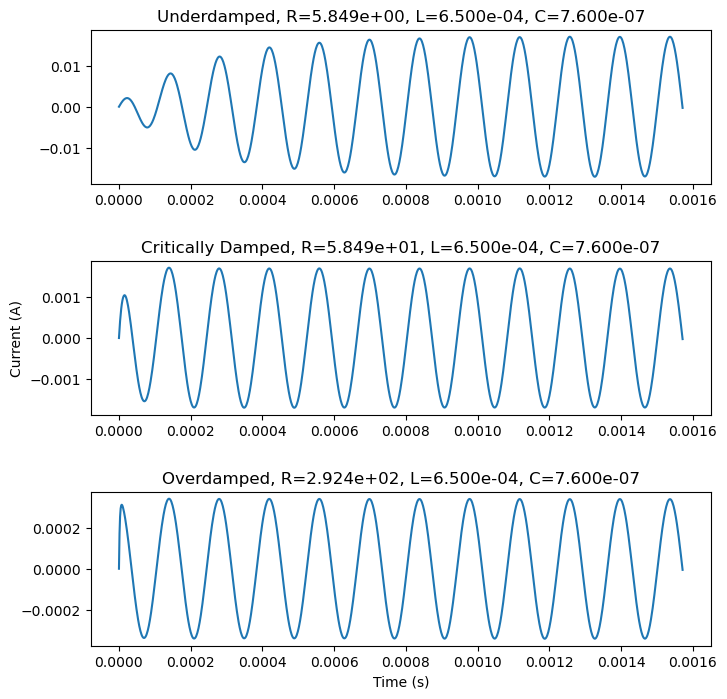

Time for cell: cell-project2-2 time: 0.30


Text(0.5, 0, 'Frequency (Hz)')

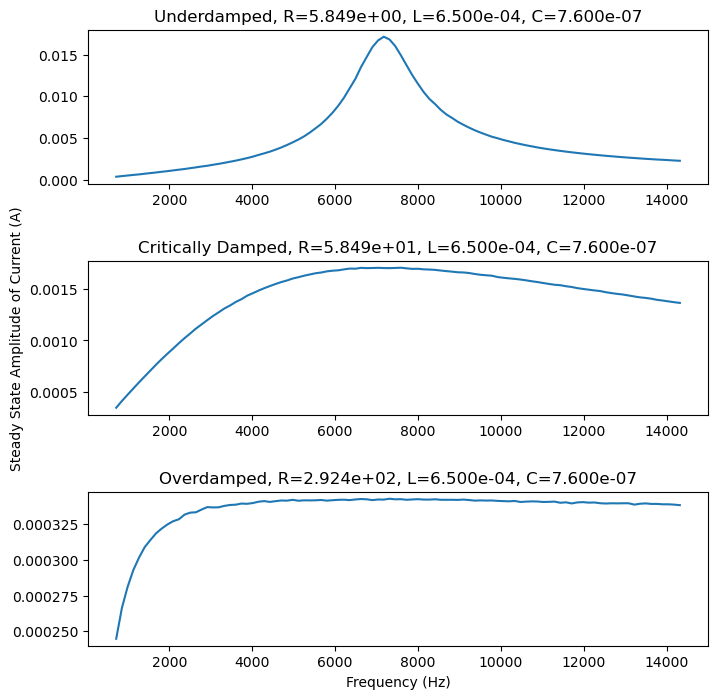

Time for cell: cell-project2-3 time: 9.17
Total time: 9.47


In [10]:
# Check execution time
nb_name = "project02.ipynb"
cells_to_time = []
stop_at = ['cell-extension']
%run -i time_cells2.py

In [11]:
# 5. Code optimization/timing (grader use only)

In [12]:
# B2. New Functionality/Language features (grader use only)